In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split


In [185]:
wine = pd.read_csv(r"C:\Users\mcken\OneDrive\Documents\Willamette\Data505\Week 4\wine.csv")

In [186]:
X = wine['description']
y = (wine['country'] == 'US')

In [187]:
wine.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,lprice
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2.708050
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2.639057
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,2.564949
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,4.174387
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,2.708050


### Question 1

Use the train_test_split function to split X and y into X_train, X_test, y_train, y_test. What is the shape of each of these? Note that right now X is just a single column of text.

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [189]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
##This has created four separate series objects.  We would have to reference index values to get an array.  The train series are 60002 and the test
##The test series' is 29554

((60002,), (29554,), (60002,), (29554,))

### Question 2

Create a CountVectorizer (pick whatever parameters you like for max_df, min_df, and max_features), fit it to X_train, and use it to transform X_train. 

In [252]:
stopwords=['10', '100', '20', '2015','2016','2017','2018','2019','2020','2021','2022', 'all', 'an', 'are', 'as', 'at', 'be','but','by','for','from','has',
          'in', 'is', 'it','its','now','of','on','that','the','this','through','to','well','with','wine','while']
stopwords2=['english','10', '100', '20', '2015','2016','2017','2018','2019','2020','2021','2022']
#is there a way to add more terms and still use english?  Using this other option takes the term english literally.
vectorizer = CountVectorizer(max_df=0.85, min_df=5,
                                   max_features=200,
                                   stop_words=stopwords)
X_train_tf = vectorizer.fit_transform(X_train)

In [253]:
vectorizer.get_feature_names_out()

array(['acidity', 'age', 'aging', 'almost', 'along', 'alongside', 'also',
       'apple', 'aromas', 'attractive', 'baked', 'baking', 'balance',
       'balanced', 'barrel', 'berry', 'big', 'bit', 'bitter', 'black',
       'blackberry', 'blend', 'blueberry', 'bodied', 'body', 'bottling',
       'bright', 'cabernet', 'cassis', 'character', 'chardonnay',
       'cherry', 'chocolate', 'cinnamon', 'citrus', 'clean', 'clove',
       'coffee', 'color', 'come', 'complex', 'concentrated', 'core',
       'cranberry', 'creamy', 'crisp', 'crushed', 'currant', 'dark',
       'delicious', 'delivers', 'dense', 'dried', 'drink', 'dry', 'earth',
       'earthy', 'easy', 'elegant', 'feel', 'feels', 'fine', 'finish',
       'finishes', 'firm', 'flavor', 'flavors', 'floral', 'franc',
       'fresh', 'freshness', 'fruit', 'fruits', 'fruity', 'full',
       'generous', 'give', 'glass', 'good', 'grapefruit', 'great',
       'green', 'herb', 'herbal', 'herbs', 'high', 'hint', 'hints',
       'intense', 'into'

### Question 3

Create a DataFrame out of the transformed version of X_train. This will require using .toarray() to turn the sparse matrix into a numpy array, and then to get the column names we will need to use your count vectorizer's .get_feature_names_out() method.

In [254]:
pd.DataFrame(X_train_tf.toarray(), columns = vectorizer.get_feature_names_out())

,acidity,age,aging,almost,along,alongside,also,apple,aromas,attractive,...,white,wild,will,wood,years,yellow,yet,you,young,zest
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
59998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
60000,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


### Question 4

Create a decision tree classifier, specifying at least one hyperparameter (like max_depth but up to you). Then fit it to your dataframe from question 3, and y_train.

In [255]:
model = tree.DecisionTreeClassifier(max_depth=23, min_samples_leaf=4, min_samples_split=3)

model.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=23, min_samples_leaf=4, min_samples_split=3)

In [256]:
model.score(X_train_tf, y_train)

0.8672210926302456

### Question 5

Compute and print the cross-validated model score on your training data.

In [257]:
#in sample performance
model.score(vectorizer.transform(X_train), y_train)

0.8672210926302456

In [258]:
model.score(X_train_tf, y_train)

0.8672210926302456

In [259]:
#out of sample performance
X_test_tf=vectorizer.transform(X_test)
model.score(X_test_tf, y_test)

0.8166068890843879

In [260]:
cross_val_score(model, X_train_tf, y_train, cv=5)

array([0.81384885, 0.81409883, 0.8135    , 0.81266667, 0.8185    ])

In [261]:
cross_val_score(model, X_test_tf, y_test, cv=5)

array([0.79005244, 0.78971409, 0.79715784, 0.79174421, 0.80473773])

### Question 6

Use your vectorizer to transform X_test, and turn the resulting sparse matrix into a dataframe with column names (same as question 3).

In [262]:
X_test_tf = vectorizer.transform(X_test)

In [263]:
X_test_df=pd.DataFrame(X_test_tf.toarray(), columns = vectorizer.get_feature_names_out())
X_test_df

,acidity,age,aging,almost,along,alongside,also,apple,aromas,attractive,...,white,wild,will,wood,years,yellow,yet,you,young,zest
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29549,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29550,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29551,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
29552,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 7

Use your model to make predictions on your testing data. Compare these against y_test and show the model accuracy. How does it compare to your cross-validated scores on the training data? - Answer: The score has deteriorated from my CV scores.  It is within proximity but is not performing as well as on CV. - Update, once I fine tuned my hyperparameters using the loops, this improved considerably and is now fairly comparable to my CVs.

In [264]:
y_pred = model.predict(X_test_tf)

In [265]:
sum(y_pred == y_test) / len(y_test)

0.8166068890843879

### Question 8 - NOT GRADED

Please take a few minutes to reflect on why we should use cross-validation.
Answer:
It provides us with the ability to test the model against unseen data, not used in the training.  It can also help us to identify a good hyperparameter so we don't overfit our model to our training data.  Based on some additional research I did into the subject another issue is to help address smaller data sets.  All available data may need to be used in the training of the model.  We need to have some sense for model performance using predictions/tests, even if available data is exhausted.  Using cross validation is a way to address this.  

### Extra Credit

I'll award one point of extra credit if you analyze a range of hyperparameters using cross-validation to improve your model's performance. 

I'll award additional extra credit to the one person with the highest model score on the test data!

In [217]:
for max_depth in range(5, 25):
    model = tree.DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(model, X_train_tf, y_train, cv=5)
    print(max_depth, scores.mean(),'\t', scores.std())

5 0.7177259811682359 	 0.003742237215355038
6 0.733575461767075 	 0.00430228524277406
7 0.7425584617948504 	 0.0034182005912271073
8 0.757091303502486 	 0.006585030552054873
9 0.7719574674332695 	 0.00791058294762581
10 0.7812240257756298 	 0.0047418686635677006
11 0.7855072813376662 	 0.005528710370901952
12 0.7879905299558371 	 0.0045947126516785695
13 0.7903404632947254 	 0.004501596097946155
14 0.7904903660806044 	 0.002242817592696465
15 0.7938735744243535 	 0.002389834526744473
16 0.7975734688775935 	 0.0021520918719499208
17 0.8001233966613892 	 0.0029052996392858175
18 0.8024900174985419 	 0.002880855222593619
19 0.8047566077826847 	 0.0025037442894251657
20 0.8053399008415966 	 0.002629845691872885
21 0.8099730175263172 	 0.0016718937413296958
22 0.8108230355803684 	 0.0015720696407775677
23 0.8130063133627754 	 0.0034685212479678438
24 0.8142395161514318 	 0.002452026992243786
25 0.8147562022609227 	 0.0022969162599347386
26 0.8141228480959921 	 0.0031904828570575024
27 0.814

In [219]:
perf_data = pd.Series([], name='accuracy')

In [221]:
for max_depth in range(3, 25):
    model = tree.DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(model, X_train_tf, y_train, cv=5)
    perf_data[max_depth] = scores.mean()

<Axes: >

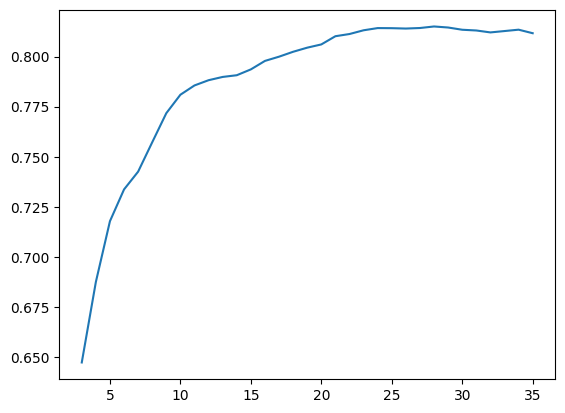

In [222]:
perf_data.plot()

In [226]:
perf_data1 = pd.Series([], name='accuracy')

In [228]:
for min_samples_split in range(3, 10):
    model = tree.DecisionTreeClassifier(max_depth=23, min_samples_split = min_samples_split)
    scores = cross_val_score(model, X_train_tf, y_train, cv=5)
    perf_data1[min_samples_split] = scores.mean()

<Axes: >

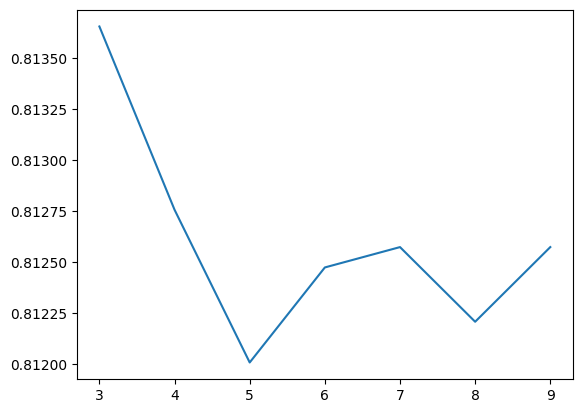

In [229]:
perf_data1.plot()

In [230]:
perf_data2 = pd.Series([], name='accuracy')

In [231]:
for min_samples_leaf in range(3, 10):
    model = tree.DecisionTreeClassifier(max_depth=23, min_samples_split=3, min_samples_leaf = min_samples_leaf)
    scores = cross_val_score(model, X_train_tf, y_train, cv=5)
    perf_data2[min_samples_leaf] = scores.mean()

<Axes: >

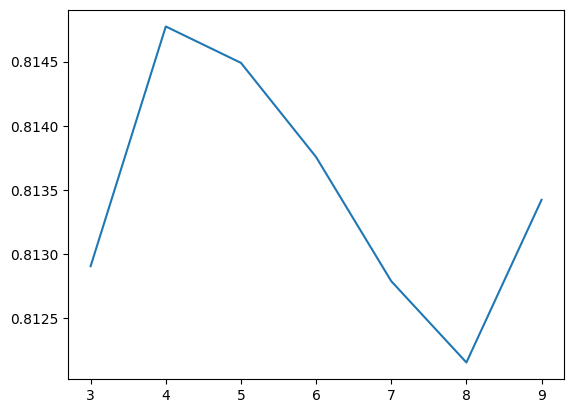

In [232]:
perf_data2.plot()